In [122]:
import networkx as nx
import time
import resource 

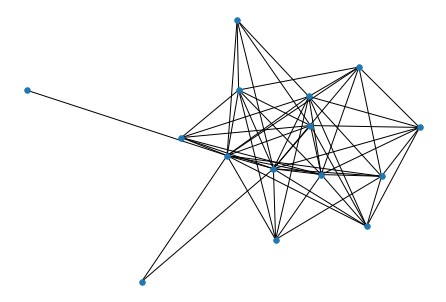

In [123]:
G_list = []
pos_G_list = []

for i in range(6):
    for j in range(100):
        G=nx.barabasi_albert_graph(15,i+2)
        G_list.append(G)
        pos_G = nx.spring_layout(G)
        pos_G_list.append(pos_G)
nx.draw(G, pos=pos_G, with_labels=False, node_size=30)

In [124]:
len(G_list)

600

In [125]:
import math

def dot(v,w):
    x,y = v
    X,Y = w
    return x*X + y*Y

def length(v):
    x,y = v
    return math.sqrt(x*x + y*y)

def vector(b,e):
    x,y = b
    X,Y = e
    return (X-x, Y-y)

def unit(v):
    x,y = v
    mag = length(v)
    return (x/mag, y/mag)

def distance(p0,p1):
    return length(vector(p0,p1))

def scale(v,sc):
    x,y = v
    return (x * sc, y * sc)

def add(v,w):
    x,y = v
    X,Y = w
    return (x+X, y+Y)


def pnt2line(pnt, start, end):   #node position as input
    line_vec = vector(start, end)
    pnt_vec = vector(start, pnt)
    line_len = length(line_vec)
    line_unitvec = unit(line_vec)
    pnt_vec_scaled = scale(pnt_vec, 1.0/line_len)
    t = dot(line_unitvec, pnt_vec_scaled)    
    if t < 0.0:
        t = 0.0
    elif t > 1.0:
        t = 1.0
    nearest = scale(line_vec, t)
    dist = distance(nearest, pnt_vec)
    nearest = add(nearest, start)
    return dist


def dist_euclidean(p1, p2, pos):  #node name as input and pos to specify name of position variable for this graph
    x1, y1 = pos[p1]
    x2, y2 = pos[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

In [126]:

def dist_euclidean_G1(p1, p2):
    x1, y1 = pos_G1[p1]
    x2, y2 = pos_G1[p2]
    return ((x2-x1)**2+(y2-y1)**2)**(1/2)

In [127]:
def Human_gaze_algorithm(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = []
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[start_node], pos[end_node])
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_2(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes


def Human_gaze_algorithm_3(Graph, start_node, end_node, pos):
    current_node = start_node
    visited_nodes = [start_node]
    dead_nodes = [] # a node might be added multiple times to this know maybe as it was before might not be a problem
    while current_node != end_node:
        neighbors = list(Graph.neighbors(current_node))
        for i in visited_nodes:
            if i in neighbors:
                neighbors.remove(i)
        for i in dead_nodes:
            if i in neighbors:
                neighbors.remove(i)
        
        
        if len(neighbors) == 0:
            visited_nodes.remove(current_node)
            dead_nodes.append(current_node)
            
            while len(neighbors) == 0:                                                  
                current_node = visited_nodes[-1]
                neighbors = list(Graph.neighbors(current_node))
                # is this still necessary if we have dead_nodes conditional
                for i in visited_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                for i in dead_nodes:
                    if i in neighbors:
                        neighbors.remove(i)
                visited_nodes.remove(current_node) # instead of adding it again to visited nodes we want to take it away 
                
            visited_nodes.append(current_node) 
            
        options = {} 
        
        for i in neighbors:
                options[i] = pnt2line(pos[i], pos[current_node], pos[end_node])
                options[i] += dist_euclidean(i, end_node, pos)
        current_node = min(options, key=options.get)
        visited_nodes.append(current_node)  
               
    return visited_nodes

In [128]:
# We only want the paths where HG is longer 
def compare_path(L1, L2): #inputs are the list of list(paths) for all node pairs for dijkstra and HG, same size lists
    different_path = []
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L2)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
                different_path.append([L1[i], L2[i]])
        #return [different_path, n, len(L1), n/len(L1)*100] 
        return different_path
    
def HG_error(L1, L2):
    n = 0
    if L1 == L2:
        return "Equal"
    else:
        for i in range(len(L2)): #L1 and L2 should be the same length
            if len(L1[i]) < len(L2[i]):
                n += 1
        #return [n, len(L1), n/len(L1)*100]
        return n/len(L1)*100
    
    
    
def compare_runtime(Graph, Graph_set_DG, Graph_set_HG, algorithm, pos): #always compare HG versions to dijkstra since we don't specify the alg. in the arguments
   
    time_start_DG = time.perf_counter_ns()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_DG.append(nx.dijkstra_path(Graph, i, j))
    time_elapsed_DG = (time.perf_counter_ns() - time_start_DG)
    memMb_DG=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
    
    time_start_HG = time.perf_counter_ns()
    for i in list(Graph.nodes):
        for j in list(Graph.nodes):
            Graph_set_HG.append(algorithm(Graph, i, j, pos))
    time_elapsed_HG = (time.perf_counter_ns() - time_start_HG)
    memMb_HG=resource.getrusage(resource.RUSAGE_SELF).ru_maxrss/1024.0/1024.0
    
    

    
    return print ( "%5.1f nsecs %5.1f nMByte" % (time_elapsed_HG,memMb_HG), "%5.1f nsecs %5.1f MByte" % (time_elapsed_DG,memMb_DG))

In [129]:
# Create 19 empty list for each graph for each algorithm (Dijkstra, Version 1, 2 and 3)
for k in range(1,601):
    exec(f'DG_{k} = []')  #The variables will be DG_1, DG_2 etc..
    
for k in range(1,601): 
    exec(f'HG1_{k} = []')    
    
for k in range(1,601):
    exec(f'HG2_{k} = []') 

for k in range(1,601):
    exec(f'HG3_{k} = []')    
    
for k in range(1,601):
    exec(f'A_{k} = []') 

In [130]:
# Writing them all out

# As all these list are global variables running this cell multiple times willcontinue to add all the node pairs
# Only run once

DG_list = []

for k in range(1,601):
    exec(f'DG_{k} = []')
    exec(f'DG_list.append(DG_{k})')

for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            DG_list[k].append(nx.dijkstra_path(G_list[k], i, j))
            
HG1_list = []

for k in range(1,601):
    exec(f'HG1_{k} = []')
    exec(f'HG1_list.append(HG1_{k})')
    
for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            HG1_list[k].append(Human_gaze_algorithm(G_list[k],i,j,pos_G_list[k]))
            

HG2_list = []

for k in range(1,601):
    exec(f'HG2_{k} = []')
    exec(f'HG2_list.append(HG2_{k})')
    
for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            HG2_list[k].append(Human_gaze_algorithm_2(G_list[k],i,j,pos_G_list[k]))
            
HG3_list = []

for k in range(1,601):
    exec(f'HG3_{k} = []')
    exec(f'HG3_list.append(HG3_{k})')
    
for k in range(len(G_list)):
    for i in list(G_list[k].nodes):
        for j in list(G_list[k].nodes):
            HG3_list[k].append(Human_gaze_algorithm_3(G_list[k],i,j,pos_G_list[k]))
            
            

In [131]:
for i in range(len(G_list)):
    print(compare_path(DG_list[i], HG1_list[i]))

[[[0, 2, 3, 7], [0, 2, 1, 3, 7]], [[0, 2, 1, 8], [0, 2, 4, 9, 7, 8]], [[0, 2, 1, 12], [0, 2, 4, 9, 12]], [[0, 2, 3, 13], [0, 2, 5, 3, 13]], [[1, 4, 9], [1, 8, 7, 9]], [[1, 3, 13], [1, 6, 3, 13]], [[1, 2, 14], [1, 4, 9, 7, 8, 14]], [[2, 3, 7], [2, 1, 3, 7]], [[2, 1, 8], [2, 4, 9, 7, 8]], [[2, 1, 12], [2, 4, 9, 12]], [[3, 2, 0], [3, 5, 2, 0]], [[3, 1, 4], [3, 5, 7, 8, 14, 2, 4]], [[3, 7, 9], [3, 1, 8, 7, 9]], [[3, 1, 10], [3, 6, 1, 10]], [[4, 9, 7], [4, 1, 8, 7]], [[4, 1, 8], [4, 9, 7, 8]], [[4, 2, 14], [4, 9, 7, 8, 14]], [[5, 2, 0], [5, 3, 11, 2, 0]], [[5, 7, 8], [5, 3, 1, 8]], [[5, 7, 9], [5, 3, 1, 8, 7, 9]], [[5, 7, 10], [5, 3, 6, 1, 10]], [[6, 1, 2, 0], [6, 3, 7, 5, 2, 0]], [[6, 3, 7], [6, 1, 10, 7]], [[6, 1, 4, 9], [6, 1, 8, 7, 9]], [[6, 1, 2, 14], [6, 1, 4, 2, 14]], [[7, 9, 4], [7, 8, 1, 4]], [[7, 3, 6], [7, 10, 1, 6]], [[7, 3, 11], [7, 5, 3, 11]], [[8, 1, 2, 0], [8, 1, 4, 2, 0]], [[8, 7, 5], [8, 1, 3, 5]], [[8, 7, 9], [8, 1, 4, 9]], [[9, 4, 1], [9, 7, 8, 1]], [[9, 7, 5], [9, 4, 1,

In [132]:
for i in range(len(G_list)):
    print(compare_path(DG_list[i], HG2_list[i]))

[[[0, 2, 3, 7], [0, 2, 1, 8, 7]], [[0, 2, 1, 8], [0, 2, 4, 9, 12, 1, 8]], [[0, 2, 1, 12], [0, 2, 4, 9, 12]], [[1, 4, 9], [1, 8, 7, 9]], [[1, 3, 13], [1, 6, 3, 13]], [[1, 2, 14], [1, 4, 9, 7, 8, 14]], [[2, 3, 7], [2, 1, 8, 7]], [[2, 1, 8], [2, 4, 9, 12, 1, 8]], [[2, 1, 12], [2, 4, 9, 12]], [[3, 2, 0], [3, 5, 2, 0]], [[3, 1, 4], [3, 5, 2, 4]], [[3, 7, 9], [3, 1, 8, 7, 9]], [[3, 1, 10], [3, 6, 1, 10]], [[4, 9, 7], [4, 1, 8, 7]], [[4, 1, 8], [4, 9, 12, 1, 8]], [[4, 1, 3, 13], [4, 1, 6, 3, 13]], [[4, 2, 14], [4, 9, 12, 1, 8, 14]], [[5, 2, 0], [5, 3, 2, 0]], [[5, 7, 8], [5, 3, 1, 8]], [[5, 7, 9], [5, 3, 1, 8, 7, 9]], [[5, 7, 10], [5, 3, 6, 1, 10]], [[6, 1, 2, 0], [6, 3, 5, 2, 0]], [[6, 3, 7], [6, 1, 8, 7]], [[6, 1, 4, 9], [6, 1, 8, 7, 9]], [[6, 1, 2, 14], [6, 1, 4, 9, 7, 8, 14]], [[7, 3, 2, 0], [7, 3, 5, 2, 0]], [[7, 9, 4], [7, 8, 1, 4]], [[7, 3, 6], [7, 10, 1, 6]], [[7, 3, 11], [7, 5, 3, 11]], [[8, 7, 5], [8, 1, 3, 5]], [[8, 7, 9], [8, 1, 12, 9]], [[9, 4, 1], [9, 7, 8, 1]], [[9, 7, 5], [9, 

In [133]:
for i in range(len(G_list)):
    print(compare_path(DG_list[i], HG3_list[i]))

[[[0, 2, 3, 7], [0, 2, 1, 6, 3, 7]], [[0, 2, 1, 8], [0, 2, 4, 9, 12, 1, 8]], [[1, 3, 7], [1, 6, 3, 7]], [[1, 4, 9], [1, 8, 7, 9]], [[1, 3, 13], [1, 6, 3, 13]], [[1, 2, 14], [1, 4, 2, 14]], [[2, 3, 7], [2, 1, 6, 3, 7]], [[2, 1, 8], [2, 4, 9, 12, 1, 8]], [[3, 7, 9], [3, 1, 8, 7, 9]], [[3, 1, 10], [3, 6, 1, 10]], [[4, 9, 7], [4, 1, 6, 3, 7]], [[4, 1, 8], [4, 9, 12, 1, 8]], [[4, 1, 3, 13], [4, 1, 6, 3, 13]], [[5, 2, 1], [5, 7, 8, 1]], [[5, 3, 6], [5, 7, 10, 1, 6]], [[6, 3, 7], [6, 1, 3, 7]], [[6, 1, 4, 9], [6, 1, 8, 7, 9]], [[6, 1, 2, 14], [6, 1, 4, 2, 14]], [[7, 9, 4], [7, 8, 14, 2, 4]], [[7, 3, 6], [7, 10, 1, 6]], [[7, 3, 11], [7, 5, 3, 11]], [[8, 1, 4], [8, 14, 2, 4]], [[8, 1, 6], [8, 7, 10, 1, 6]], [[8, 7, 9], [8, 1, 12, 9]], [[9, 4, 1], [9, 7, 8, 1]], [[9, 4, 1, 6], [9, 7, 10, 1, 6]], [[9, 7, 8], [9, 4, 1, 8]], [[10, 1, 2, 0], [10, 7, 5, 2, 0]], [[10, 1, 2], [10, 7, 3, 2]], [[10, 1, 6], [10, 7, 3, 6]], [[10, 7, 9], [10, 1, 8, 7, 9]], [[10, 1, 2, 11], [10, 7, 5, 3, 11]], [[10, 1, 2, 14

[[[1, 4, 0], [1, 11, 4, 0]], [[1, 4, 3], [1, 6, 4, 3]], [[1, 4, 12], [1, 5, 2, 12]], [[2, 4, 3], [2, 6, 4, 3]], [[2, 4, 10], [2, 7, 3, 10]], [[3, 4, 0], [3, 11, 4, 0]], [[3, 4, 2], [3, 10, 6, 2]], [[5, 3, 10], [5, 2, 7, 3, 10]], [[6, 4, 0], [6, 11, 4, 0]], [[7, 4, 0], [7, 3, 11, 4, 0]], [[8, 4, 0], [8, 1, 11, 4, 0]], [[8, 2, 7], [8, 10, 3, 7]], [[8, 5, 14], [8, 2, 12, 14]], [[9, 8, 4, 0], [9, 8, 1, 11, 4, 0]], [[9, 2, 6], [9, 3, 4, 6]], [[9, 8, 10], [9, 2, 7, 3, 10]], [[9, 3, 11], [9, 5, 4, 11]], [[10, 4, 0], [10, 6, 11, 4, 0]], [[10, 8, 2], [10, 3, 5, 2]], [[11, 3, 9], [11, 4, 8, 9]], [[12, 9, 3], [12, 2, 6, 4, 3]], [[12, 8, 10], [12, 2, 7, 3, 10]], [[13, 8, 4, 0], [13, 1, 11, 4, 0]], [[13, 8, 10], [13, 5, 2, 7, 3, 10]], [[13, 5, 14], [13, 9, 12, 14]], [[14, 10, 4, 0], [14, 10, 6, 11, 4, 0]]]
[[[0, 4, 3], [0, 10, 4, 3]], [[0, 5, 9], [0, 4, 5, 9]], [[1, 4, 2], [1, 9, 8, 2]], [[2, 4, 3], [2, 8, 0, 10, 4, 3]], [[2, 4, 10], [2, 8, 14, 10]], [[2, 5, 12], [2, 4, 1, 12]], [[3, 4, 2], [3, 9, 

[[[0, 6, 14], [0, 5, 12, 14]], [[2, 10, 8], [2, 5, 6, 7, 8]], [[4, 5, 2], [4, 12, 5, 2]], [[4, 5, 13], [4, 6, 5, 13]], [[5, 0, 8], [5, 6, 7, 8]], [[6, 5, 2], [6, 12, 5, 2]], [[6, 0, 8], [6, 5, 7, 8]], [[7, 5, 4], [7, 1, 6, 4]], [[8, 10, 2], [8, 12, 5, 2]], [[9, 1, 7], [9, 4, 6, 7]], [[9, 1, 8], [9, 6, 5, 7, 8]], [[9, 1, 13], [9, 3, 5, 13]], [[10, 0, 11], [10, 8, 7, 11]], [[11, 0, 5, 2], [11, 6, 12, 5, 2]], [[11, 6, 3], [11, 4, 9, 3]], [[11, 1, 13], [11, 6, 5, 13]], [[12, 5, 1], [12, 4, 6, 1]], [[12, 5, 3], [12, 13, 5, 3]], [[12, 4, 9], [12, 13, 5, 9]], [[12, 4, 11], [12, 8, 7, 11]], [[13, 5, 2], [13, 12, 5, 2]], [[13, 5, 4], [13, 1, 6, 4]], [[14, 6, 3], [14, 13, 5, 3]], [[14, 6, 4], [14, 13, 1, 6, 4]], [[14, 12, 8], [14, 6, 5, 7, 8]]]
[[[0, 5, 4], [0, 13, 5, 4]], [[0, 5, 8], [0, 6, 5, 8]], [[0, 5, 14], [0, 13, 5, 14]], [[1, 5, 2], [1, 7, 10, 5, 2]], [[1, 5, 14], [1, 8, 4, 14]], [[2, 5, 4], [2, 13, 0, 12, 9, 14, 4]], [[2, 5, 14], [2, 13, 5, 14]], [[3, 5, 2], [3, 7, 10, 5, 2]], [[4, 5, 0

In [134]:
for i in range(len(G_list)):
    print(HG_error(DG_list[i], HG1_list[i]))

27.111111111111114
24.444444444444443
24.88888888888889
21.777777777777775
16.444444444444446
17.77777777777778
25.77777777777778
26.222222222222225
28.000000000000004
31.11111111111111
21.777777777777775
29.777777777777775
25.333333333333336
17.77777777777778
28.888888888888886
27.555555555555557
26.666666666666668
30.666666666666664
24.88888888888889
24.0
19.555555555555557
16.88888888888889
23.555555555555554
18.666666666666668
24.88888888888889
22.22222222222222
25.77777777777778
24.0
8.88888888888889
26.666666666666668
19.11111111111111
31.11111111111111
29.333333333333332
18.22222222222222
18.22222222222222
26.222222222222225
25.333333333333336
25.333333333333336
13.777777777777779
21.333333333333336
25.333333333333336
17.333333333333336
22.666666666666664
20.88888888888889
27.111111111111114
20.444444444444446
27.111111111111114
20.0
22.22222222222222
13.333333333333334
25.333333333333336
22.22222222222222
26.222222222222225
21.333333333333336
36.888888888888886
24.4444444444444

In [135]:
for i in range(len(G_list)):
    print(HG_error(DG_list[i], HG3_list[i]))

20.88888888888889
15.555555555555555
8.444444444444445
12.444444444444445
8.88888888888889
11.11111111111111
21.777777777777775
10.666666666666668
18.22222222222222
24.88888888888889
14.222222222222221
24.0
16.0
4.444444444444445
24.444444444444443
12.444444444444445
13.333333333333334
14.666666666666666
14.666666666666666
11.555555555555555
13.777777777777779
13.777777777777779
24.0
13.777777777777779
22.22222222222222
12.444444444444445
19.555555555555557
13.777777777777779
2.666666666666667
14.666666666666666
11.555555555555555
18.22222222222222
26.222222222222225
14.222222222222221
3.111111111111111
15.555555555555555
14.666666666666666
19.11111111111111
3.111111111111111
16.444444444444446
10.666666666666668
9.777777777777779
8.88888888888889
18.666666666666668
22.22222222222222
8.0
18.666666666666668
11.555555555555555
15.555555555555555
6.666666666666667
15.11111111111111
14.666666666666666
20.444444444444446
14.222222222222221
28.000000000000004
17.77777777777778
16.44444444444

9.777777777777779
5.333333333333334
7.555555555555555
8.0
7.555555555555555
9.333333333333334
6.222222222222222
8.88888888888889
7.111111111111111
4.0
3.5555555555555554
4.888888888888889
9.777777777777779
11.11111111111111
8.444444444444445
8.88888888888889
8.88888888888889
7.555555555555555
6.222222222222222
11.11111111111111
10.222222222222223
5.777777777777778
4.444444444444445
9.777777777777779
4.0
6.222222222222222
5.777777777777778
7.555555555555555


In [136]:

for i in range(len(G_list)):
    print(compare_runtime(G_list[i], DG_list[i], HG1_list[i], Human_gaze_algorithm, pos_G_list[i]))

13356375.0 nsecs 257.9 nMByte 3467292.0 nsecs 257.9 MByte
None
14025791.0 nsecs 257.9 nMByte 3639500.0 nsecs 257.9 MByte
None
17636000.0 nsecs 257.9 nMByte 3483916.0 nsecs 257.9 MByte
None
15453375.0 nsecs 257.9 nMByte 3451292.0 nsecs 257.9 MByte
None
13887416.0 nsecs 257.9 nMByte 3660250.0 nsecs 257.9 MByte
None
11779875.0 nsecs 257.9 nMByte 3280959.0 nsecs 257.9 MByte
None
15629875.0 nsecs 257.9 nMByte 3404417.0 nsecs 257.9 MByte
None
13429459.0 nsecs 257.9 nMByte 3268458.0 nsecs 257.9 MByte
None
12722875.0 nsecs 257.9 nMByte 3207250.0 nsecs 257.9 MByte
None
15204042.0 nsecs 257.9 nMByte 3348250.0 nsecs 257.9 MByte
None
13059250.0 nsecs 257.9 nMByte 3564750.0 nsecs 257.9 MByte
None
13080625.0 nsecs 257.9 nMByte 3291625.0 nsecs 257.9 MByte
None
12916959.0 nsecs 257.9 nMByte 3374166.0 nsecs 257.9 MByte
None
14544625.0 nsecs 257.9 nMByte 3268250.0 nsecs 257.9 MByte
None
14093333.0 nsecs 257.9 nMByte 3447541.0 nsecs 257.9 MByte
None
13077542.0 nsecs 257.9 nMByte 3552834.0 nsecs 257.9 MBy

14595625.0 nsecs 257.9 nMByte 3858041.0 nsecs 257.9 MByte
None
13387875.0 nsecs 257.9 nMByte 3868083.0 nsecs 257.9 MByte
None
14948917.0 nsecs 257.9 nMByte 3911208.0 nsecs 257.9 MByte
None
14791167.0 nsecs 257.9 nMByte 3994584.0 nsecs 257.9 MByte
None
13479208.0 nsecs 257.9 nMByte 3802042.0 nsecs 257.9 MByte
None
13696959.0 nsecs 257.9 nMByte 3909333.0 nsecs 257.9 MByte
None
14278917.0 nsecs 257.9 nMByte 3924583.0 nsecs 257.9 MByte
None
14258584.0 nsecs 257.9 nMByte 3802041.0 nsecs 257.9 MByte
None
14857667.0 nsecs 257.9 nMByte 4395333.0 nsecs 257.9 MByte
None
14757875.0 nsecs 257.9 nMByte 3930042.0 nsecs 257.9 MByte
None
13939042.0 nsecs 257.9 nMByte 3929000.0 nsecs 257.9 MByte
None
13872583.0 nsecs 257.9 nMByte 3909791.0 nsecs 257.9 MByte
None
15204500.0 nsecs 257.9 nMByte 3911166.0 nsecs 257.9 MByte
None
14377333.0 nsecs 257.9 nMByte 3864667.0 nsecs 257.9 MByte
None
14349792.0 nsecs 257.9 nMByte 4028625.0 nsecs 257.9 MByte
None
14516125.0 nsecs 257.9 nMByte 3884833.0 nsecs 257.9 MBy

15410125.0 nsecs 257.9 nMByte 4427292.0 nsecs 257.9 MByte
None
15575375.0 nsecs 257.9 nMByte 4250875.0 nsecs 257.9 MByte
None
15514667.0 nsecs 257.9 nMByte 4481750.0 nsecs 257.9 MByte
None
16011417.0 nsecs 257.9 nMByte 4312167.0 nsecs 257.9 MByte
None
15516959.0 nsecs 257.9 nMByte 4261583.0 nsecs 257.9 MByte
None
15493250.0 nsecs 257.9 nMByte 4368875.0 nsecs 257.9 MByte
None
15065750.0 nsecs 257.9 nMByte 4354834.0 nsecs 257.9 MByte
None
16444167.0 nsecs 257.9 nMByte 4506250.0 nsecs 257.9 MByte
None
16391125.0 nsecs 257.9 nMByte 4400917.0 nsecs 257.9 MByte
None
15004542.0 nsecs 257.9 nMByte 4409167.0 nsecs 257.9 MByte
None
15249625.0 nsecs 257.9 nMByte 4278208.0 nsecs 257.9 MByte
None
14588375.0 nsecs 257.9 nMByte 4310875.0 nsecs 257.9 MByte
None
15029000.0 nsecs 257.9 nMByte 4396084.0 nsecs 257.9 MByte
None
15237542.0 nsecs 257.9 nMByte 4254333.0 nsecs 257.9 MByte
None
16860750.0 nsecs 257.9 nMByte 4505875.0 nsecs 257.9 MByte
None
15684750.0 nsecs 257.9 nMByte 4389250.0 nsecs 257.9 MBy

16922833.0 nsecs 257.9 nMByte 4943541.0 nsecs 257.9 MByte
None
15796667.0 nsecs 257.9 nMByte 4826166.0 nsecs 257.9 MByte
None
17620542.0 nsecs 257.9 nMByte 4939959.0 nsecs 257.9 MByte
None
16770708.0 nsecs 257.9 nMByte 5178291.0 nsecs 257.9 MByte
None
16949208.0 nsecs 257.9 nMByte 4971041.0 nsecs 257.9 MByte
None
16856625.0 nsecs 257.9 nMByte 5057167.0 nsecs 257.9 MByte
None
16801500.0 nsecs 257.9 nMByte 4962833.0 nsecs 257.9 MByte
None
17148584.0 nsecs 257.9 nMByte 5009541.0 nsecs 257.9 MByte
None
16816833.0 nsecs 257.9 nMByte 5055916.0 nsecs 257.9 MByte
None
16845083.0 nsecs 257.9 nMByte 4992708.0 nsecs 257.9 MByte
None
16368250.0 nsecs 257.9 nMByte 4972958.0 nsecs 257.9 MByte
None
16240959.0 nsecs 257.9 nMByte 4868666.0 nsecs 257.9 MByte
None
16417750.0 nsecs 257.9 nMByte 4875625.0 nsecs 257.9 MByte
None
17133667.0 nsecs 257.9 nMByte 4999000.0 nsecs 257.9 MByte
None
17470750.0 nsecs 257.9 nMByte 4936750.0 nsecs 257.9 MByte
None
16738583.0 nsecs 257.9 nMByte 4884042.0 nsecs 257.9 MBy

17719333.0 nsecs 257.9 nMByte 5093292.0 nsecs 257.9 MByte
None
17632167.0 nsecs 257.9 nMByte 5049375.0 nsecs 257.9 MByte
None
16254833.0 nsecs 257.9 nMByte 4906250.0 nsecs 257.9 MByte
None
17377459.0 nsecs 257.9 nMByte 5079125.0 nsecs 257.9 MByte
None
17694334.0 nsecs 257.9 nMByte 5011250.0 nsecs 257.9 MByte
None
16406333.0 nsecs 257.9 nMByte 4899625.0 nsecs 257.9 MByte
None
17056459.0 nsecs 257.9 nMByte 4985916.0 nsecs 257.9 MByte
None
17044208.0 nsecs 257.9 nMByte 5011125.0 nsecs 257.9 MByte
None
16968958.0 nsecs 257.9 nMByte 5021959.0 nsecs 257.9 MByte
None
16342875.0 nsecs 257.9 nMByte 4903667.0 nsecs 257.9 MByte
None
17322750.0 nsecs 257.9 nMByte 4929916.0 nsecs 257.9 MByte
None
17884959.0 nsecs 257.9 nMByte 5340583.0 nsecs 257.9 MByte
None
16670792.0 nsecs 257.9 nMByte 5067958.0 nsecs 257.9 MByte
None
18041292.0 nsecs 257.9 nMByte 5161834.0 nsecs 257.9 MByte
None
16367792.0 nsecs 257.9 nMByte 5111833.0 nsecs 257.9 MByte
None
16827708.0 nsecs 257.9 nMByte 5011125.0 nsecs 257.9 MBy

In [137]:
for i in range(len(G_list)):
    print(compare_runtime(G_list[i], DG_list[i], HG2_list[i], Human_gaze_algorithm_2, pos_G_list[i]))

12418000.0 nsecs 257.9 nMByte 3384208.0 nsecs 257.9 MByte
None
13103834.0 nsecs 257.9 nMByte 3420625.0 nsecs 257.9 MByte
None
12371542.0 nsecs 257.9 nMByte 3429875.0 nsecs 257.9 MByte
None
12094167.0 nsecs 257.9 nMByte 3292083.0 nsecs 257.9 MByte
None
11706125.0 nsecs 257.9 nMByte 3376125.0 nsecs 257.9 MByte
None
12521875.0 nsecs 257.9 nMByte 3291125.0 nsecs 257.9 MByte
None
14438917.0 nsecs 257.9 nMByte 3525375.0 nsecs 257.9 MByte
None
12516041.0 nsecs 257.9 nMByte 3297541.0 nsecs 257.9 MByte
None
11621125.0 nsecs 257.9 nMByte 3287875.0 nsecs 257.9 MByte
None
14632083.0 nsecs 257.9 nMByte 3349167.0 nsecs 257.9 MByte
None
12218042.0 nsecs 257.9 nMByte 3386708.0 nsecs 257.9 MByte
None
12847000.0 nsecs 257.9 nMByte 3327375.0 nsecs 257.9 MByte
None
12465916.0 nsecs 257.9 nMByte 3337708.0 nsecs 257.9 MByte
None
11751666.0 nsecs 257.9 nMByte 3351584.0 nsecs 257.9 MByte
None
12200083.0 nsecs 257.9 nMByte 3245416.0 nsecs 257.9 MByte
None
12833791.0 nsecs 257.9 nMByte 3414333.0 nsecs 257.9 MBy

13657000.0 nsecs 257.9 nMByte 3921750.0 nsecs 257.9 MByte
None
14395375.0 nsecs 257.9 nMByte 3909833.0 nsecs 257.9 MByte
None
12766667.0 nsecs 257.9 nMByte 3891792.0 nsecs 257.9 MByte
None
15090250.0 nsecs 257.9 nMByte 3973750.0 nsecs 257.9 MByte
None
14321917.0 nsecs 257.9 nMByte 4071875.0 nsecs 257.9 MByte
None
13280459.0 nsecs 257.9 nMByte 3832791.0 nsecs 257.9 MByte
None
12764000.0 nsecs 257.9 nMByte 3878917.0 nsecs 257.9 MByte
None
13739916.0 nsecs 257.9 nMByte 3997083.0 nsecs 257.9 MByte
None
13050792.0 nsecs 257.9 nMByte 3761750.0 nsecs 257.9 MByte
None
15460334.0 nsecs 257.9 nMByte 4015958.0 nsecs 257.9 MByte
None
13850209.0 nsecs 257.9 nMByte 4006958.0 nsecs 257.9 MByte
None
13824458.0 nsecs 257.9 nMByte 3914792.0 nsecs 257.9 MByte
None
13659458.0 nsecs 257.9 nMByte 3904583.0 nsecs 257.9 MByte
None
14289209.0 nsecs 257.9 nMByte 3911083.0 nsecs 257.9 MByte
None
13741750.0 nsecs 257.9 nMByte 3842833.0 nsecs 257.9 MByte
None
13430958.0 nsecs 257.9 nMByte 4044625.0 nsecs 257.9 MBy

14980208.0 nsecs 257.9 nMByte 4403958.0 nsecs 257.9 MByte
None
15434083.0 nsecs 257.9 nMByte 4262125.0 nsecs 257.9 MByte
None
14950500.0 nsecs 257.9 nMByte 4403334.0 nsecs 257.9 MByte
None
15043458.0 nsecs 257.9 nMByte 4325333.0 nsecs 257.9 MByte
None
14695792.0 nsecs 257.9 nMByte 4294916.0 nsecs 257.9 MByte
None
15111125.0 nsecs 257.9 nMByte 4354541.0 nsecs 257.9 MByte
None
14506583.0 nsecs 257.9 nMByte 4333042.0 nsecs 257.9 MByte
None
16288833.0 nsecs 257.9 nMByte 4658084.0 nsecs 257.9 MByte
None
15618709.0 nsecs 257.9 nMByte 4428709.0 nsecs 257.9 MByte
None
14590625.0 nsecs 257.9 nMByte 4438208.0 nsecs 257.9 MByte
None
15185958.0 nsecs 257.9 nMByte 4339541.0 nsecs 257.9 MByte
None
14099833.0 nsecs 257.9 nMByte 4281666.0 nsecs 257.9 MByte
None
14774708.0 nsecs 257.9 nMByte 4415292.0 nsecs 257.9 MByte
None
14730542.0 nsecs 257.9 nMByte 4436250.0 nsecs 257.9 MByte
None
15769959.0 nsecs 257.9 nMByte 4387583.0 nsecs 257.9 MByte
None
14977125.0 nsecs 257.9 nMByte 4354208.0 nsecs 257.9 MBy

17055084.0 nsecs 257.9 nMByte 5525250.0 nsecs 257.9 MByte
None
16795500.0 nsecs 257.9 nMByte 5146459.0 nsecs 257.9 MByte
None
16032041.0 nsecs 257.9 nMByte 5106792.0 nsecs 257.9 MByte
None
16853208.0 nsecs 257.9 nMByte 5481792.0 nsecs 257.9 MByte
None
17000333.0 nsecs 257.9 nMByte 7803500.0 nsecs 257.9 MByte
None
16764042.0 nsecs 257.9 nMByte 5210083.0 nsecs 257.9 MByte
None
16389667.0 nsecs 257.9 nMByte 5228708.0 nsecs 257.9 MByte
None
15954458.0 nsecs 257.9 nMByte 5281791.0 nsecs 257.9 MByte
None
15693959.0 nsecs 257.9 nMByte 4955708.0 nsecs 257.9 MByte
None
16219833.0 nsecs 257.9 nMByte 5374375.0 nsecs 257.9 MByte
None
17347417.0 nsecs 257.9 nMByte 5654125.0 nsecs 257.9 MByte
None
17372083.0 nsecs 257.9 nMByte 7192416.0 nsecs 257.9 MByte
None
16997291.0 nsecs 257.9 nMByte 5032000.0 nsecs 257.9 MByte
None
16982250.0 nsecs 257.9 nMByte 5122958.0 nsecs 257.9 MByte
None
17671750.0 nsecs 257.9 nMByte 5003417.0 nsecs 257.9 MByte
None
16211500.0 nsecs 257.9 nMByte 5999333.0 nsecs 257.9 MBy

16132333.0 nsecs 257.9 nMByte 6035541.0 nsecs 257.9 MByte
None
16416500.0 nsecs 257.9 nMByte 4976917.0 nsecs 257.9 MByte
None
16947459.0 nsecs 257.9 nMByte 5262500.0 nsecs 257.9 MByte
None
16446708.0 nsecs 257.9 nMByte 5023500.0 nsecs 257.9 MByte
None
16809042.0 nsecs 257.9 nMByte 5083459.0 nsecs 257.9 MByte
None
16287666.0 nsecs 257.9 nMByte 5075500.0 nsecs 257.9 MByte
None
18168667.0 nsecs 257.9 nMByte 5796375.0 nsecs 257.9 MByte
None
17962875.0 nsecs 257.9 nMByte 5723208.0 nsecs 257.9 MByte
None
16966791.0 nsecs 257.9 nMByte 5222583.0 nsecs 257.9 MByte
None
16765708.0 nsecs 257.9 nMByte 5133083.0 nsecs 257.9 MByte
None
15941208.0 nsecs 257.9 nMByte 4984375.0 nsecs 257.9 MByte
None
16348417.0 nsecs 257.9 nMByte 5583208.0 nsecs 257.9 MByte
None
16529750.0 nsecs 257.9 nMByte 5024458.0 nsecs 257.9 MByte
None
17166500.0 nsecs 257.9 nMByte 5198167.0 nsecs 257.9 MByte
None
16935417.0 nsecs 257.9 nMByte 5100583.0 nsecs 257.9 MByte
None
15950750.0 nsecs 257.9 nMByte 5369833.0 nsecs 257.9 MBy

In [138]:
for i in range(len(G_list)):
    print(compare_runtime(G_list[i], DG_list[i], HG3_list[i], Human_gaze_algorithm_3, pos_G_list[i]))

17214292.0 nsecs 257.9 nMByte 3835541.0 nsecs 257.9 MByte
None
16933125.0 nsecs 257.9 nMByte 4143041.0 nsecs 257.9 MByte
None
267827125.0 nsecs 257.9 nMByte 3482625.0 nsecs 257.9 MByte
None
18518958.0 nsecs 257.9 nMByte 3265458.0 nsecs 257.9 MByte
None
15620208.0 nsecs 257.9 nMByte 3244750.0 nsecs 257.9 MByte
None
15770792.0 nsecs 257.9 nMByte 3253916.0 nsecs 257.9 MByte
None
19981084.0 nsecs 257.9 nMByte 3589541.0 nsecs 257.9 MByte
None
14675792.0 nsecs 257.9 nMByte 3254666.0 nsecs 257.9 MByte
None
14575334.0 nsecs 257.9 nMByte 3145709.0 nsecs 257.9 MByte
None
18296917.0 nsecs 257.9 nMByte 3347125.0 nsecs 257.9 MByte
None
15406916.0 nsecs 257.9 nMByte 3293583.0 nsecs 257.9 MByte
None
17823542.0 nsecs 257.9 nMByte 3327584.0 nsecs 257.9 MByte
None
16613750.0 nsecs 257.9 nMByte 3385584.0 nsecs 257.9 MByte
None
14340125.0 nsecs 257.9 nMByte 3322792.0 nsecs 257.9 MByte
None
16470958.0 nsecs 257.9 nMByte 3316208.0 nsecs 257.9 MByte
None
17409084.0 nsecs 257.9 nMByte 3379750.0 nsecs 257.9 MB

19009417.0 nsecs 257.9 nMByte 3945750.0 nsecs 257.9 MByte
None
19089167.0 nsecs 257.9 nMByte 3964250.0 nsecs 257.9 MByte
None
17595084.0 nsecs 257.9 nMByte 3796167.0 nsecs 257.9 MByte
None
17685083.0 nsecs 257.9 nMByte 4023958.0 nsecs 257.9 MByte
None
19293916.0 nsecs 257.9 nMByte 3999375.0 nsecs 257.9 MByte
None
17292625.0 nsecs 257.9 nMByte 3768375.0 nsecs 257.9 MByte
None
18574709.0 nsecs 257.9 nMByte 3960375.0 nsecs 257.9 MByte
None
17950416.0 nsecs 257.9 nMByte 3906875.0 nsecs 257.9 MByte
None
18248042.0 nsecs 257.9 nMByte 3901166.0 nsecs 257.9 MByte
None
17247125.0 nsecs 257.9 nMByte 3920000.0 nsecs 257.9 MByte
None
17912500.0 nsecs 257.9 nMByte 3892458.0 nsecs 257.9 MByte
None
18630875.0 nsecs 257.9 nMByte 3853416.0 nsecs 257.9 MByte
None
18135750.0 nsecs 257.9 nMByte 4026458.0 nsecs 257.9 MByte
None
18763958.0 nsecs 257.9 nMByte 3850084.0 nsecs 257.9 MByte
None
16886333.0 nsecs 257.9 nMByte 3826625.0 nsecs 257.9 MByte
None
18555417.0 nsecs 257.9 nMByte 3949584.0 nsecs 257.9 MBy

19616667.0 nsecs 257.9 nMByte 4213500.0 nsecs 257.9 MByte
None
20358833.0 nsecs 257.9 nMByte 4393166.0 nsecs 257.9 MByte
None
20031459.0 nsecs 257.9 nMByte 4363959.0 nsecs 257.9 MByte
None
19724250.0 nsecs 257.9 nMByte 4317334.0 nsecs 257.9 MByte
None
20723625.0 nsecs 257.9 nMByte 4339625.0 nsecs 257.9 MByte
None
19506917.0 nsecs 257.9 nMByte 4311917.0 nsecs 257.9 MByte
None
21492209.0 nsecs 257.9 nMByte 4535000.0 nsecs 257.9 MByte
None
20557875.0 nsecs 257.9 nMByte 4875667.0 nsecs 257.9 MByte
None
19355458.0 nsecs 257.9 nMByte 4423416.0 nsecs 257.9 MByte
None
20023000.0 nsecs 257.9 nMByte 4334667.0 nsecs 257.9 MByte
None
20001000.0 nsecs 257.9 nMByte 4279584.0 nsecs 257.9 MByte
None
19612084.0 nsecs 257.9 nMByte 4401291.0 nsecs 257.9 MByte
None
20303583.0 nsecs 257.9 nMByte 4507250.0 nsecs 257.9 MByte
None
22680459.0 nsecs 257.9 nMByte 5838041.0 nsecs 257.9 MByte
None
19810750.0 nsecs 257.9 nMByte 4572125.0 nsecs 257.9 MByte
None
19279625.0 nsecs 257.9 nMByte 4370750.0 nsecs 257.9 MBy

23948166.0 nsecs 257.9 nMByte 5152042.0 nsecs 257.9 MByte
None
20215792.0 nsecs 257.9 nMByte 4857041.0 nsecs 257.9 MByte
None
22030417.0 nsecs 257.9 nMByte 4791167.0 nsecs 257.9 MByte
None
21925333.0 nsecs 257.9 nMByte 4973292.0 nsecs 257.9 MByte
None
22189375.0 nsecs 257.9 nMByte 4860000.0 nsecs 257.9 MByte
None
22919041.0 nsecs 257.9 nMByte 5296792.0 nsecs 257.9 MByte
None
21541750.0 nsecs 257.9 nMByte 4934959.0 nsecs 257.9 MByte
None
21426500.0 nsecs 257.9 nMByte 4940459.0 nsecs 257.9 MByte
None
21897042.0 nsecs 257.9 nMByte 6054875.0 nsecs 257.9 MByte
None
21151667.0 nsecs 257.9 nMByte 5199625.0 nsecs 257.9 MByte
None
20914083.0 nsecs 257.9 nMByte 4868459.0 nsecs 257.9 MByte
None
21890000.0 nsecs 257.9 nMByte 4877750.0 nsecs 257.9 MByte
None
21434750.0 nsecs 257.9 nMByte 4999125.0 nsecs 257.9 MByte
None
21587792.0 nsecs 257.9 nMByte 4835333.0 nsecs 257.9 MByte
None
22493417.0 nsecs 257.9 nMByte 4899958.0 nsecs 257.9 MByte
None
21446208.0 nsecs 257.9 nMByte 4906208.0 nsecs 257.9 MBy

22847625.0 nsecs 257.9 nMByte 5079750.0 nsecs 257.9 MByte
None
22050417.0 nsecs 257.9 nMByte 5119583.0 nsecs 257.9 MByte
None
24940916.0 nsecs 257.9 nMByte 5179417.0 nsecs 257.9 MByte
None
24074416.0 nsecs 257.9 nMByte 5482834.0 nsecs 257.9 MByte
None
22686000.0 nsecs 257.9 nMByte 5120667.0 nsecs 257.9 MByte
None
25280000.0 nsecs 257.9 nMByte 5205292.0 nsecs 257.9 MByte
None
24333083.0 nsecs 257.9 nMByte 5905292.0 nsecs 257.9 MByte
None
22630334.0 nsecs 257.9 nMByte 5190167.0 nsecs 257.9 MByte
None
24713084.0 nsecs 257.9 nMByte 5097166.0 nsecs 257.9 MByte
None
21597500.0 nsecs 257.9 nMByte 5046125.0 nsecs 257.9 MByte
None
23011917.0 nsecs 257.9 nMByte 5947209.0 nsecs 257.9 MByte
None
22847916.0 nsecs 257.9 nMByte 5164167.0 nsecs 257.9 MByte
None
22554458.0 nsecs 257.9 nMByte 4928750.0 nsecs 257.9 MByte
None
24078667.0 nsecs 257.9 nMByte 5442000.0 nsecs 257.9 MByte
None
23424583.0 nsecs 257.9 nMByte 5163541.0 nsecs 257.9 MByte
None
23046625.0 nsecs 257.9 nMByte 5210000.0 nsecs 257.9 MBy

In [139]:
# Network Connectivity: Number of links divided by N(N-1)
# Show as Network Connectivity increase: What happens to the legnth of the shortest path, the error rate in comparison
# to dijkstra, the run time

# When you get the reuslts for edge creation probability 0.5 and above get some data for the lower probabilites

In [140]:
def network_connectivity(Graph):
    edges = list(Graph.edges())
    nodes = list(Graph.nodes())
    return (2*len(edges))/(len(nodes)*(len(nodes)-1)) # in my path I included nodes to themselves so should it be N*N ?

In [141]:
for i in G_list:
    print(network_connectivity(i))
    
# should I be looking for a wider range of network connectivity ?

0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763
0.24761904761904763


In [142]:
import matplotlib.pyplot as plt

In [143]:
def average_len(lst):
    lengths = [len(i) for i in lst]
    return 0 if len(lengths) == 0 else (float(sum(lengths)) / len(lengths))

In [144]:
for i in HG1_list:
    print(average_len(i))

3.2266666666666666
3.1555555555555554
3.1955555555555555
3.2355555555555555
3.1066666666666665
3.1244444444444444
3.1733333333333333
3.3066666666666666
3.2933333333333334
3.328888888888889
3.24
3.2844444444444445
3.1911111111111112
3.32
3.4844444444444442
3.2222222222222223
3.2088888888888887
3.431111111111111
3.488888888888889
3.1733333333333333
3.2177777777777776
3.057777777777778
3.2711111111111113
3.04
3.3244444444444445
3.102222222222222
3.3377777777777777
3.2844444444444445
3.097777777777778
3.3955555555555557
3.0444444444444443
3.417777777777778
3.5733333333333333
3.128888888888889
3.168888888888889
3.3022222222222224
3.2044444444444444
3.2
3.16
3.1733333333333333
3.3066666666666666
2.9644444444444447
3.1244444444444444
3.2622222222222224
3.3955555555555557
3.088888888888889
3.3066666666666666
2.982222222222222
3.151111111111111
2.986666666666667
3.2088888888888887
3.36
3.151111111111111
3.28
3.5733333333333333
3.3066666666666666
3.1422222222222222
3.2888888888888888
3.324444444

In [145]:
for i in HG2_list:
    print(average_len(i))

3.1777777777777776
3.097777777777778
3.1466666666666665
3.1866666666666665
3.0355555555555553
3.0844444444444443
3.08
3.32
3.24
3.2533333333333334
3.1822222222222223
3.3155555555555556
3.168888888888889
3.1955555555555555
3.3644444444444446
3.2355555555555555
3.12
3.3333333333333335
3.493333333333333
3.1333333333333333
3.16
3.031111111111111
3.1333333333333333
3.0044444444444443
3.2355555555555555
3.102222222222222
3.2222222222222223
3.2222222222222223
3.0444444444444443
3.2711111111111113
2.982222222222222
3.36
3.502222222222222
3.0933333333333333
3.0844444444444443
3.1911111111111112
3.137777777777778
3.1066666666666665
3.048888888888889
3.088888888888889
3.2488888888888887
2.986666666666667
3.013333333333333
3.1555555555555554
3.3866666666666667
3.013333333333333
3.2222222222222223
2.9466666666666668
3.1066666666666665
2.96
3.2044444444444444
3.2311111111111113
3.168888888888889
3.1911111111111112
3.6044444444444443
3.3066666666666666
3.071111111111111
3.2577777777777777
3.253333333

In [146]:
for i in HG3_list:
    print(average_len(i))

3.111111111111111
3.0044444444444443
2.9555555555555557
3.071111111111111
3.0
3.008888888888889
3.088888888888889
3.031111111111111
3.08
3.16
3.0755555555555554
3.1555555555555554
3.0044444444444443
3.0444444444444443
3.36
3.008888888888889
2.9955555555555557
3.12
3.2888888888888888
3.0044444444444443
3.102222222222222
3.0
3.2133333333333334
2.951111111111111
3.3066666666666666
2.942222222222222
3.1777777777777776
3.062222222222222
2.991111111111111
3.1644444444444444
2.902222222222222
3.1911111111111112
3.466666666666667
3.08
2.933333333333333
3.088888888888889
3.031111111111111
3.0933333333333333
2.986666666666667
3.111111111111111
3.057777777777778
2.8666666666666667
2.902222222222222
3.1733333333333333
3.2622222222222224
2.8933333333333335
3.097777777777778
2.8266666666666667
3.071111111111111
2.8933333333333335
3.0
3.1644444444444444
3.071111111111111
3.1244444444444444
3.44
3.1866666666666665
3.062222222222222
3.048888888888889
3.1244444444444444
3.1777777777777776
3.164444444444

In [147]:
for i in DG_list:
    print(average_len(i))

2.8133333333333335
2.7955555555555556
2.8666666666666667
2.8666666666666667
2.8844444444444446
2.8844444444444446
2.7422222222222223
2.911111111111111
2.8666666666666667
2.7777777777777777
2.8844444444444446
2.831111111111111
2.8133333333333335
2.991111111111111
2.848888888888889
2.8577777777777778
2.831111111111111
2.9466666666666668
2.991111111111111
2.8044444444444445
2.8755555555555556
2.8044444444444445
2.8666666666666667
2.7866666666666666
2.8844444444444446
2.7866666666666666
2.8666666666666667
2.8844444444444446
2.9644444444444447
2.92
2.7777777777777777
2.937777777777778
2.937777777777778
2.8844444444444446
2.902222222222222
2.8755555555555556
2.831111111111111
2.7688888888888887
2.9555555555555557
2.8844444444444446
2.9466666666666668
2.7422222222222223
2.8044444444444445
2.902222222222222
2.8933333333333335
2.8133333333333335
2.84
2.671111111111111
2.848888888888889
2.8133333333333335
2.84
2.937777777777778
2.76
2.8755555555555556
2.902222222222222
2.8844444444444446
2.86666

In [148]:
# for i in A_list:
#     print(average_len(i))

In [149]:
# Plotting average average path lenghts in terms of network connectivity

In [150]:
# x = [0.2523809523809524,0.2523809523809524,0.26666666666666666,0.29523809523809524,0.36666666666666664,0.3476190476190476,0.3142857142857143,0.3761904761904762,0.3333333333333333,0.40476190476190477,0.40476190476190477,0.41904761904761906,0.4666666666666667,0.45714285714285713,0.4666666666666667]
# y_1 = [2.8,2.7822222222222224,2.6755555555555555,2.4444444444444446,2.2844444444444445,2.3451851851851853,2.497777777777778,2.2355555555555555,2.3955555555555557,2.1466666666666665,2.1244444444444444,2.1066666666666665,2.0044444444444443,2.022222222222222,2.0]
# plt.plot(x, y_1)
# plt.xlabel("Network connectivity")
# plt.ylabel(" Average path length")

In [151]:
# For network connectivity, take average of the groups of three and make a range centered at that, and then for that
# range take the corresponding average of the measured parameter such as path lenght or else
# use the double bar on the graph to have dijkstra next to them for comparison

In [152]:
average_network_connectivity = [0.24761904761904763, 0.34285714285714286, 0.41904761904761906, 0.47619047619047616, 0.5142857142857142, 0.5333333333333333]
average_network_connectivity_2 = [0.24761904761904763+0.01, 0.34285714285714286+0.01, 0.41904761904761906+0.01, 0.47619047619047616+0.01, 0.5142857142857142+0.01, 0.5333333333333333+0.01] 
average_network_connectivity_3 = [0.24761904761904763+0.02, 0.34285714285714286+0.02, 0.41904761904761906+0.02, 0.47619047619047616+0.02, 0.5142857142857142+0.02, 0.5333333333333333+0.02]
average_network_connectivity_4 = [0.24761904761904763+0.03, 0.34285714285714286+0.03, 0.41904761904761906+0.03, 0.47619047619047616+0.03, 0.5142857142857142+0.03, 0.5333333333333333+0.03]
average_network_connectivity_5 = [0.24761904761904763+0.04, 0.34285714285714286+0.04, 0.41904761904761906+0.04, 0.47619047619047616+0.04, 0.5142857142857142+0.04, 0.5333333333333333+0.04]

#average_network_connectivity = [0.20, 0.24, 0.27, 0.33, 0.39, 0.44]
#average_network_connectivity_2 = [0.20+0.01, 0.24+0.01, 0.27+0.01, 0.33+0.01, 0.39+0.01, 0.44+0.01]
#average_network_connectivity_3 = [0.20+0.02, 0.24+0.02, 0.27+0.02, 0.33+0.02, 0.39+0.02, 0.44+0.02]
#average_network_connectivity_4 = [0.20+0.03, 0.24+0.03, 0.27+0.03, 0.33+0.03, 0.39+0.03, 0.44+0.03]
#average_network_connectivity_5 = [0.20+0.04, 0.24+0.04, 0.27+0.04, 0.33+0.04, 0.39+0.04, 0.44+0.04]

# For the error function no need to have dijkstra next to it as it is using DG as a baseline already
average_path_error_HG1 = [33.1, 22.4, 19.6, 10.3, 3.2, 1.1]
average_path_error_HG2 = [32.8, 22.3, 19.6, 10.3, 3.2, 1.1]
average_path_error_HG3 = [32.8, 22.3, 19.9, 9.7, 3.2, 0.8]
#x_average_path_error = [[25.478, 13.033, 8.888, 1.481, 0.74],[25.478, 13.033, 8.888, 1.481, 0.74],[25.777, 13.184, 8.295, 1.340, 1.333]]


# For path length we do need dijkstra to compare with
average_path_length_HG1 = [3.246105499, 3.115555556, 2.734755556, 2.622666667, 2.543111111, 2.495911111]
average_path_length_HG2 = [3.195111111, 2.884266667, 2.717466667, 2.598533333, 2.5264, 2.482044444]
average_path_length_HG3 = [3.100444444, 2.822444444, 2.662844444, 2.565155556, 2.502444444, 2.469822222]
average_path_length_DG = [2.850577778, 2.621244444, 2.500622222, 2.432, 2.391466667, 2.3712]
average_path_length_HG11 = [0.40, 0.43, 0.23, 0.19, 0.15, 0.12]
average_path_length_HG22 = [0.34, 0.26, 0.21, 0.17, 0.13, 0.11]
average_path_length_HG33 = [0.24, 0.20, 0.16, 0.13, 0.11, 0.098]

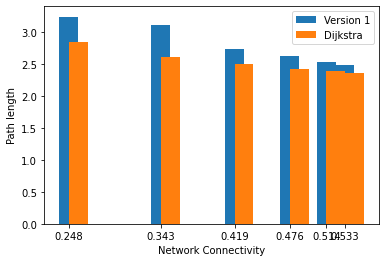

In [153]:
plt.bar(average_network_connectivity, average_path_length_HG1, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 1")
plt.bar(average_network_connectivity_2, average_path_length_DG, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

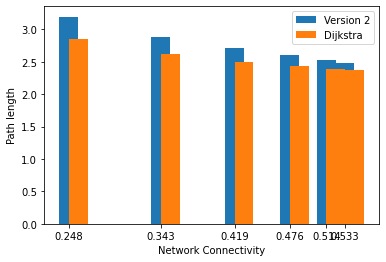

In [154]:
plt.bar(average_network_connectivity, average_path_length_HG2, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 2")
plt.bar(average_network_connectivity_2, average_path_length_DG, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

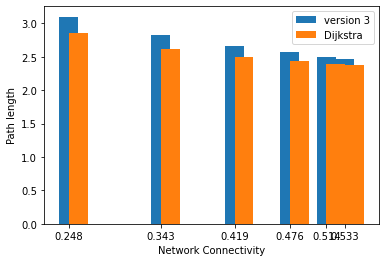

In [155]:
plt.bar(average_network_connectivity, average_path_length_HG3, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="version 3")
plt.bar(average_network_connectivity_2, average_path_length_DG, width=0.01963,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

#Note Version 3 has been Called Human Gaze Algoithm for poster 

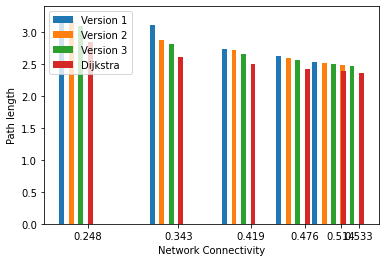

In [156]:
plt.bar(average_network_connectivity, average_path_length_HG1, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 1")
plt.bar(average_network_connectivity_2, average_path_length_HG2, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 2")
plt.bar(average_network_connectivity_3, average_path_length_HG3, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 3")
plt.bar(average_network_connectivity_4, average_path_length_DG, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Dijkstra")
plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

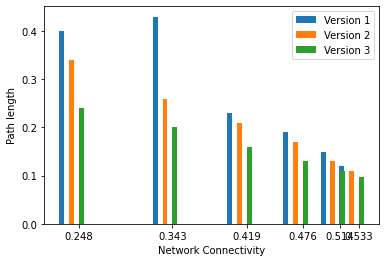

In [157]:
plt.bar(average_network_connectivity, average_path_length_HG11, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 1")
plt.bar(average_network_connectivity_2, average_path_length_HG22, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 2")
plt.bar(average_network_connectivity_3, average_path_length_HG33, width=0.005,align='edge', tick_label=[0.248, 0.343, 0.419, 0.476, 0.514, 0.533], label="Version 3")

plt.xlabel("Network Connectivity")
plt.ylabel("Path length")
plt.legend()

plt.show()

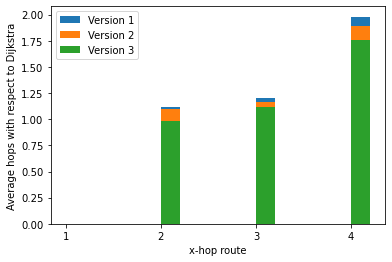

In [190]:
plt.bar([1,2,3,4], [0,1.12,1.20,1.98], width=0.2,align='edge', tick_label=[1, 2, 3, 4], label="Version 1")
plt.bar([1,2,3,4], [0,1.10,1.16,1.89], width=0.2,align='edge', tick_label=[1, 2, 3, 4], label="Version 2")
plt.bar([1,2,3,4], [0,0.98,1.12,1.76], width=0.2,align='edge', tick_label=[1, 2, 3, 4], label="Version 3")
plt.xlabel("x-hop route")
plt.ylabel("Average hops with respect to Dijkstra")
plt.legend()

plt.show()

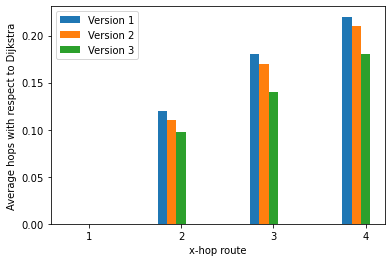

In [306]:
plt.bar([1,2,3,4], [0,0.12,0.18,0.22], width=0.1,align='center', tick_label=[1, 2, 3, 4], label="Version 1")
plt.bar([1+0.1,2+0.1,3+0.1,4+0.1], [0,0.11,0.17,0.21], width=0.1,align='center', tick_label=[1, 2, 3, 4], label="Version 2")
plt.bar([1+0.2,2+0.2,3+0.2,4+0.2], [0,0.098,0.14,0.18], width=0.1,align='center', tick_label=[1, 2, 3, 4], label="Version 3")

plt.xlabel("x-hop route")
plt.ylabel("Average hops with respect to Dijkstra")
plt.legend()

plt.show()

In [357]:
def compare_runtime_2(path1, path2): # comparind individual paths
    start_time_1 = time.time_ns()
    path1
    end_time_1 = time.time_ns()
    
    start_time_2 = time.time_ns()
    path2
    end_time_2 = time.time_ns()
    return (end_time_1-start_time_1,end_time_2-start_time_2)

In [358]:
compare_runtime_2(nx.dijkstra_path(G_list[3], 0, 6), Human_gaze_algorithm(G_list[3], 0, 6, pos_G_list[3]))

(2000, 0)

In [359]:
compare_runtime_2(nx.dijkstra_path(G_list[3], 0, 6), Human_gaze_algorithm_2(G_list[3], 0, 6, pos_G_list[3]))

(1000, 0)

In [360]:
compare_runtime_2(nx.dijkstra_path(G_list[3], 0, 6), Human_gaze_algorithm_3(G_list[3], 0, 6, pos_G_list[3]))

(1000, 0)

In [361]:
compare_runtime_2(nx.dijkstra_path(G_list[53], 0, 6), Human_gaze_algorithm(G_list[53], 0, 6, pos_G_list[53]))

(1000, 0)

In [362]:
compare_runtime_2(nx.dijkstra_path(G_list[53], 0, 6), Human_gaze_algorithm_2(G_list[53], 0, 6, pos_G_list[53]))

(1000, 0)

In [363]:
compare_runtime_2(nx.dijkstra_path(G_list[53], 0, 6), Human_gaze_algorithm_3(G_list[53], 0, 6, pos_G_list[53]))

(1000, 0)

In [364]:
compare_runtime_2(nx.dijkstra_path(G_list[153], 0, 6), Human_gaze_algorithm(G_list[153], 0, 6, pos_G_list[153]))

(1000, 0)

In [365]:
compare_runtime_2(nx.dijkstra_path(G_list[153], 0, 6), Human_gaze_algorithm_2(G_list[153], 0, 6, pos_G_list[153]))

(1000, 0)

In [366]:
compare_runtime_2(nx.dijkstra_path(G_list[153], 0, 6), Human_gaze_algorithm_3(G_list[153], 0, 6, pos_G_list[153]))

(1000, 0)

In [367]:
compare_runtime_2(nx.dijkstra_path(G_list[253], 0, 6), Human_gaze_algorithm(G_list[253], 0, 6, pos_G_list[253]))

(1000, 0)

In [368]:
compare_runtime_2(nx.dijkstra_path(G_list[253], 0, 6), Human_gaze_algorithm_2(G_list[253], 0, 6, pos_G_list[253]))

(0, 0)

In [369]:
compare_runtime_2(nx.dijkstra_path(G_list[253], 0, 6), Human_gaze_algorithm_3(G_list[253], 0, 6, pos_G_list[253]))

(1000, 0)

In [370]:
compare_runtime_2(nx.dijkstra_path(G_list[353], 0, 6), Human_gaze_algorithm(G_list[353], 0, 6, pos_G_list[253]))

(1000, 0)

In [371]:
compare_runtime_2(nx.dijkstra_path(G_list[353], 0, 6), Human_gaze_algorithm_2(G_list[353], 0, 6, pos_G_list[253]))

(1000, 0)

In [372]:
compare_runtime_2(nx.dijkstra_path(G_list[353], 0, 6), Human_gaze_algorithm_3(G_list[353], 0, 6, pos_G_list[353]))

(1000, 1000)

In [373]:
compare_runtime_2(nx.dijkstra_path(G_list[453], 0, 6), Human_gaze_algorithm(G_list[453], 0, 6, pos_G_list[253]))

(1000, 0)

In [374]:
compare_runtime_2(nx.dijkstra_path(G_list[453], 0, 6), Human_gaze_algorithm_2(G_list[453], 0, 6, pos_G_list[253]))

(1000, 1000)

In [375]:
compare_runtime_2(nx.dijkstra_path(G_list[453], 0, 6), Human_gaze_algorithm_3(G_list[453], 0, 6, pos_G_list[353]))

(1000, 0)

In [376]:
compare_runtime_2(nx.dijkstra_path(G_list[553], 0, 6), Human_gaze_algorithm(G_list[553], 0, 6, pos_G_list[253]))

(2000, 0)

In [377]:
compare_runtime_2(nx.dijkstra_path(G_list[553], 0, 6), Human_gaze_algorithm_2(G_list[553], 0, 6, pos_G_list[253]))

(1000, 0)

In [378]:
compare_runtime_2(nx.dijkstra_path(G_list[553], 0, 6), Human_gaze_algorithm_3(G_list[553], 0, 6, pos_G_list[353]))

(1000, 0)